# Install dependencies

In [ ]:
#@title Setup
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Create delayed decision task

My goal is to model human memory during a delayed decision task. To mimic the time delay for humans, each episode's delay frame will be an object-less grid. I created the task in array and Matplotlib. The neural network is trained with images generated by Matplotlib.

In [ ]:
#@title Delayed Decision Task in Array (Not Used)
import numpy as np
import random

# grid room for computer: array
# an object with random [shape, size, color]
# robj = np.random.randint(0, 3, 3)

# create empty room: a 4 by 4 grid with no object
# will be used as empty delay frame
blank = [[[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]]]

## a random col + a random row in the room
# tile = random.choice(random.choice(blank))

# cue frame: a room with one random object
robj_1 = np.random.randint(0, 3, 3) # object 1 in cue

cue_shape = robj_1[0] # cue object's shape

row = random.randint(0, 3)
col = random.randint(0, 3)
blank[row][col] = robj_1
cue = blank # cue frame

# reset blank
blank = [[[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]]]

# test frame: a room with two random objects
robj_2 = np.random.randint(0, 3, 3) # object 1 in test
robj_2[0] = cue_shape # same shape as cue object
row = random.randint(0, 3)
col = random.randint(0, 3)
blank[row][col] = robj_2

robj_3 = np.random.randint(0, 3, 3) # object 2 in test
if robj_3[0] != cue_shape: # different shape from cue object
    row = random.randint(0, 3)
    col = random.randint(0, 3)
    blank[row][col] = robj_3
    test = blank # test frame

# empty delay frame
delay = [[[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]],
         [[None, None, None],[None, None, None],[None, None, None],[None, None, None]]]

# expected CNN output: [shape,shape,shape]

print(delay)
print(cue)
print(test)

[[[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], [None, None, None], [None, None, None], [None, None, None]]]
[[[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], array([1, 1, 2]), [None, None, None], [None, None, None]]]
[[[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], [None, None, None], [None, None, None], [None, None, None]], [[None, None, None], array([2, 0, 1]), [None, None, None], [None, None, None]], [[None, None, None], [None, None, None], [None, None, None], [None, None, None]]]


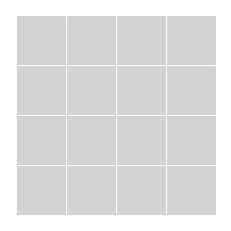

In [ ]:
#@title Delayed Decision Task: Delay Frame in Matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 4*4 grid = 16 tile
tile_1 = plt.Rectangle((1, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_2 = plt.Rectangle((3, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_3 = plt.Rectangle((5, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_4 = plt.Rectangle((7, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_5 = plt.Rectangle((1, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_6 = plt.Rectangle((3, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_7 = plt.Rectangle((5, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_8 = plt.Rectangle((7, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_9 = plt.Rectangle((1, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_10 = plt.Rectangle((3, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_11 = plt.Rectangle((5, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_12 = plt.Rectangle((7, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_13 = plt.Rectangle((1, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_14 = plt.Rectangle((3, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_15 = plt.Rectangle((5, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_16 = plt.Rectangle((7, 7), width=1.9,height=1.9, color = 'lightgrey')

test = plt.gca()
test.add_patch(tile_1)
test.add_patch(tile_2)
test.add_patch(tile_3)
test.add_patch(tile_4)
test.add_patch(tile_5)
test.add_patch(tile_6)
test.add_patch(tile_7)
test.add_patch(tile_8)
test.add_patch(tile_9)
test.add_patch(tile_10)
test.add_patch(tile_11)
test.add_patch(tile_12)
test.add_patch(tile_13)
test.add_patch(tile_14)
test.add_patch(tile_15)
test.add_patch(tile_16)

plt.axis('scaled')
plt.axis('off')
plt.show()

Here is to randomize the objects' shape, color, size, and location on the grid.

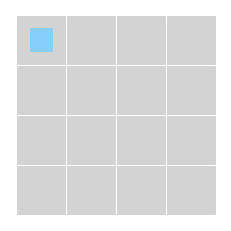

In [ ]:
#@title Delayed Decision Task: Cue Frame in Matplotlib

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 4*4 grid = 16 tile
tile_1 = plt.Rectangle((1, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_2 = plt.Rectangle((3, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_3 = plt.Rectangle((5, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_4 = plt.Rectangle((7, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_5 = plt.Rectangle((1, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_6 = plt.Rectangle((3, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_7 = plt.Rectangle((5, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_8 = plt.Rectangle((7, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_9 = plt.Rectangle((1, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_10 = plt.Rectangle((3, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_11 = plt.Rectangle((5, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_12 = plt.Rectangle((7, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_13 = plt.Rectangle((1, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_14 = plt.Rectangle((3, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_15 = plt.Rectangle((5, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_16 = plt.Rectangle((7, 7), width=1.9,height=1.9, color = 'lightgrey')

# list of object position
square_x = [1.5, 3.5, 5.5, 7.5]
square_y = [1.5, 3.5, 5.5, 7.5]
triangle_x = [2, 4, 6, 8]
triangle_y = [2, 4, 6, 8]
circle_x = [2, 4, 6, 8]
circle_y = [2, 4, 6, 8]

# list of object color
colors = ['tomato', 'limegreen', 'lightskyblue']

# randomize sqaure's height and weight
square_len = random.uniform(0.3, 1)

# object with random radius
square = plt.Rectangle((random.choice(square_x), random.choice(square_y)), width = square_len,height = square_len, color = random.choice(colors))
triangle = mpatches.RegularPolygon((random.choice(triangle_x), random.choice(triangle_y)), 3, radius = random.uniform(0.3, 0.7), color = random.choice(colors))
circle = plt.Circle((random.choice(circle_x), random.choice(circle_y)), radius = random.uniform(0.3, 0.7), color = random.choice(colors))

cue = plt.gca()
cue.add_patch(tile_1)
cue.add_patch(tile_2)
cue.add_patch(tile_3)
cue.add_patch(tile_4)
cue.add_patch(tile_5)
cue.add_patch(tile_6)
cue.add_patch(tile_7)
cue.add_patch(tile_8)
cue.add_patch(tile_9)
cue.add_patch(tile_10)
cue.add_patch(tile_11)
cue.add_patch(tile_12)
cue.add_patch(tile_13)
cue.add_patch(tile_14)
cue.add_patch(tile_15)
cue.add_patch(tile_16)

# randomly select one object
cue_objects = [square, circle, triangle]
cue_object = random.choice(cue_objects)

cue.add_patch(cue_object)

plt.axis('scaled')
plt.axis('off')
plt.show()

Based on the previous step's randomization, I will randomly take out two objects from the following three options: triangle, square, and circle.I then use a while loop to sort different combinations of the objects, only break the while loop when there is one and only one object's shape match with the cue object.


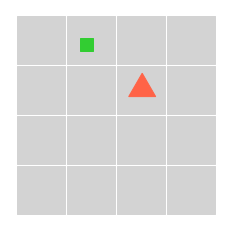

In [ ]:
#@title Delayed Decision Task: Test Frame in Matplotlib

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 4*4 grid = 16 tile
tile_1 = plt.Rectangle((1, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_2 = plt.Rectangle((3, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_3 = plt.Rectangle((5, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_4 = plt.Rectangle((7, 1), width=1.9,height=1.9, color = 'lightgrey')
tile_5 = plt.Rectangle((1, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_6 = plt.Rectangle((3, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_7 = plt.Rectangle((5, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_8 = plt.Rectangle((7, 3), width=1.9,height=1.9, color = 'lightgrey')
tile_9 = plt.Rectangle((1, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_10 = plt.Rectangle((3, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_11 = plt.Rectangle((5, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_12 = plt.Rectangle((7, 5), width=1.9,height=1.9, color = 'lightgrey')
tile_13 = plt.Rectangle((1, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_14 = plt.Rectangle((3, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_15 = plt.Rectangle((5, 7), width=1.9,height=1.9, color = 'lightgrey')
tile_16 = plt.Rectangle((7, 7), width=1.9,height=1.9, color = 'lightgrey')

# list of object position
square_x = [1.5, 3.5, 5.5, 7.5]
square_y = [1.5, 3.5, 5.5, 7.5]
triangle_x = [2, 4, 6, 8]
triangle_y = [2, 4, 6, 8]
circle_x = [2, 4, 6, 8]
circle_y = [2, 4, 6, 8]

# list of object color
colors = ['tomato', 'limegreen', 'lightskyblue']

# randomize sqaure's height and weight
square_len = random.uniform(0.3, 1)

# object with random radius
square = plt.Rectangle((random.choice(square_x), random.choice(square_y)), width = square_len,height = square_len, color = random.choice(colors))
triangle = mpatches.RegularPolygon((random.choice(triangle_x), random.choice(triangle_y)), 3, radius = random.uniform(0.3, 0.7), color = random.choice(colors))
circle = plt.Circle((random.choice(circle_x), random.choice(circle_y)), radius = random.uniform(0.3, 0.7), color = random.choice(colors))

test = plt.gca()
test.add_patch(tile_1)
test.add_patch(tile_2)
test.add_patch(tile_3)
test.add_patch(tile_4)
test.add_patch(tile_5)
test.add_patch(tile_6)
test.add_patch(tile_7)
test.add_patch(tile_8)
test.add_patch(tile_9)
test.add_patch(tile_10)
test.add_patch(tile_11)
test.add_patch(tile_12)
test.add_patch(tile_13)
test.add_patch(tile_14)
test.add_patch(tile_15)
test.add_patch(tile_16)

# randomly select two object
while True:
  square = plt.Rectangle((random.choice(square_x), random.choice(square_y)), width = square_len,height = square_len, color = random.choice(colors))
  triangle = mpatches.RegularPolygon((random.choice(triangle_x), random.choice(triangle_y)), 3, radius = random.uniform(0.3, 0.7), color = random.choice(colors))
  circle = plt.Circle((random.choice(circle_x), random.choice(circle_y)), radius = random.uniform(0.3, 0.7), color = random.choice(colors))
  test_objects = [square, circle, triangle]
  t_objects = random.sample(test_objects, 2)
  if type(t_objects[0]) == type(cue_object) or type(t_objects[1]) == type(cue_object) and type(t_objects[0]) != type(t_objects[1]): # if one and only one testing object match with cue object
    for index, obj in enumerate(t_objects):
      test.add_patch(t_objects[index])
    break

plt.axis('scaled')
plt.axis('off')
plt.show()

I will create a sequence of cue-delay-test using matplotlib.animation and random

In [ ]:
from matplotlib.animation import FuncAnimation

In [ ]:
import random # the two random float will be the same

random.seed(10) 
print(random.random())

random.seed(10)
print(random.random())

random.random_integers(1,10) #max length: 10
random.random_integers(1,20) #max length: 20
random.random_integers(1,30) #max length: 30

0.5714025946899135
0.5714025946899135


# Define neural network model

Prepare dataset: <br>
----
1) use only cue frame <br>
2) split into train and validation dataset

TO DO: <br>
1) data bring down to [0, 1] with normalization; <br>
2) compare RGB with grayscale.


Model architecture: <br>
----
Input layer: dimensions 256, 256, 3 <br>
Output layer: dimensions 1 (flatten to connect with LSTM) <br>

Apply 3 Convolutional layer with increasing order of filter size = (8, 16, 32) and fixed kernel size = (2, 2, 2) <br>
Apply 3 Max Pooling layers after the convolutional layer

Next Step: <br>
----
1) understand timesteps in LSTM, connect CNN output with LSTM <br>
2) get location of the selected object from test frame <br>
3) use the center of the object to determine the grid position <br>
if 0 < center_x < 2 -> 1st row <br>
if 0 < center_y < 2 -> 1st col <br>
highlight grid (1,1)

In [ ]:
#@title Prepare Training and Validation Images

from tensorflow import keras

batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/My Drive/MiniGrid/Train',
    labels='inferred',
    label_mode='categorical',
    color_mode="rgb",
    batch_size=4,
    class_names = ['triangle', 'square', 'circle'],
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/My Drive/MiniGrid/Train',
    labels='inferred',
    label_mode='categorical',
    color_mode="rgb",
    batch_size=4,
    class_names = ['triangle', 'square', 'circle'],
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
)

Found 300 files belonging to 3 classes.
Using 240 files for training.
Found 300 files belonging to 3 classes.
Using 60 files for validation.


CNN output [circle, square, triangle] <br>
if triangle [1, 0, 0] <br>
if square [0, 1, 0] <br>
if circle [0, 0, 1] <br>

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(batch_shape=(4, 256, 256,3)))
model.add(keras.layers.Conv2D(filters = 8, kernel_size= 2, strides=(1, 1), data_format = 'channels_last', activation='relu')) #input: 3 RGB channels
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(keras.layers.Conv2D(filters = 16, kernel_size = 2, strides=(1, 1), activation='relu')) 
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 2, strides=(1, 1), activation='relu')) 
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(keras.layers.Flatten(data_format = 'channels_last')) # connect CNN output with LSTM
model.add(keras.layers.LSTM(units = 4, return_sequences=True, return_state=True))
model.add(keras.layers.Flatten(data_format = 'channels_last'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

ValueError: ignored

In [ ]:
model.fit(train_data, epochs=10)

In [ ]:
model.summary()

In [ ]:
#@title Convert Array Range to 0 - 1 (Not Used)
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

norm_data = NormalizeData()
print(norm_data)

In [ ]:
#@title Prepare Training Images (Greyscale / 1D) (Not Used)

import tensorflow as tf

directory = '/content/drive/My Drive/MiniGrid/Train'

grey_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    color_mode="grayscale",
    batch_size=32,
    class_names = ['triangle', 'square', 'circle'],
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=0.5,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
)

print(grey_data)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs